Problem Statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Step 1: Reading and Understanding the Data

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler #To perform scaling

from sklearn.cluster import KMeans #For KMeans Clustering
from sklearn.metrics import silhouette_score #To calculate Silhouette score to calculate number of clusters

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
countries = pd.read_csv('Country-data.csv',index_col='country')
# countries = pd.read_csv('Country-data.csv')
countries

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [4]:
countries.shape

(167, 9)

In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


**There appears to be no missing data**

In [6]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**The way that the numerical values are increasing seem to not be normal. Hence there appears to be a likelihood of outliers. Looking at these later as part of visualization and outlier treatment.**

## Step 2: Data Cleaning and Visualization

#### Data Dictionary


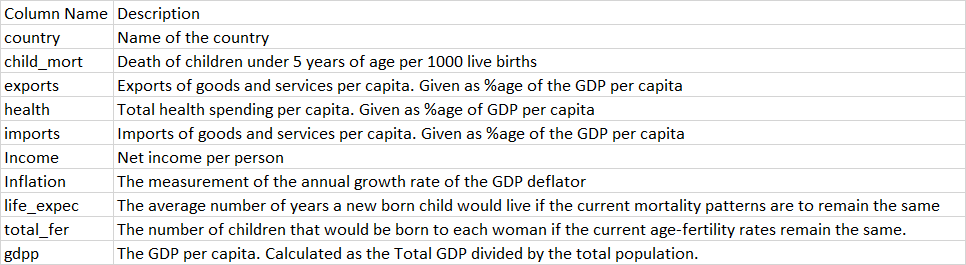

**exports, health abd import columns are given as percentage of GDP per capita i.e. gdpp. Converting these to absolutes.**

In [7]:
countries['exports'] = countries['exports']*countries['gdpp']/100
countries['health'] = countries['health']*countries['gdpp']/100
countries['imports'] = countries['imports']*countries['gdpp']/100
countries

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310


**This conversion gives more clarity about the actual situation since gdpp is vastly different across countries.<br>
e.g. Venezuela has just 17.6% imports while Vietnam has 80.2% imports, however once we convert these to absolutes, Venezuela imports value is 2376 while that for Vietnam is just 1050.620**

In [8]:
num_cols = list(countries.describe().columns)
num_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

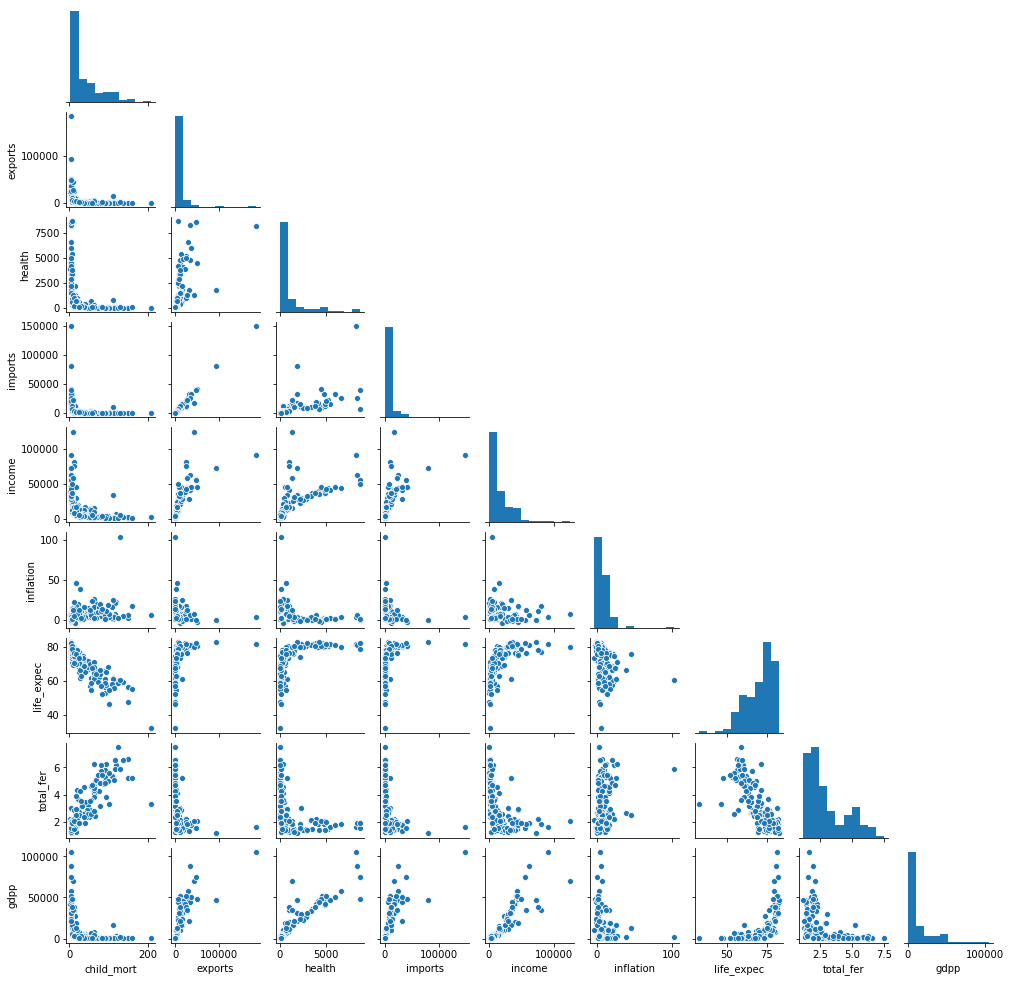

In [9]:
# Creating a pairplot for looking at relationship between different numerical variables

sns.pairplot (countries, vars = num_cols, height=1.5, corner=True)
plt.show()

In [10]:
countries[num_cols].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


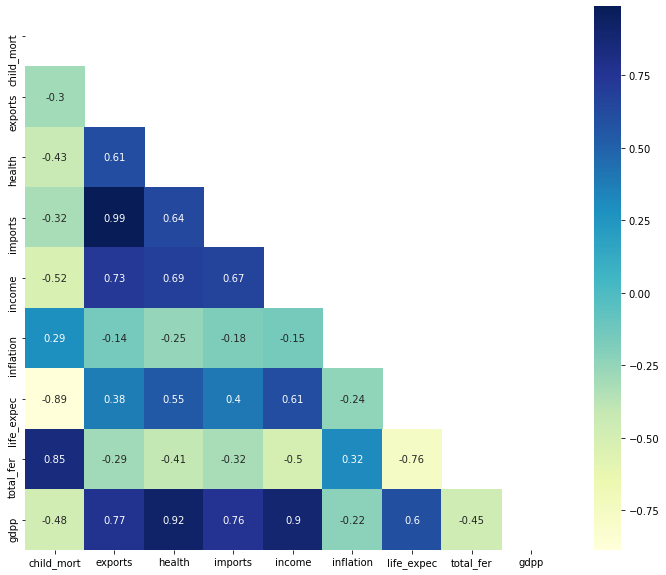

In [11]:
matrix = np.triu(countries.corr())
plt.figure(figsize=[12,10])
sns.heatmap(countries.corr(), annot=True, mask=matrix, cmap = 'YlGnBu');

**Looking at the pair plots, correlation matrix and heatmap, the following variables are highly correlated**

- imports and exports: 99%
- gdpp and health: 92%
- gdpp and income: 90%
- total_fer and child_mort: 85%
- gdpp and exports: 77%
- gdpp and imports: 76%
- exports and income: 73%

**In all the cases above, there is positive correlation between the variables i.e. as one variable increases so does the other.**

- life_expec and child_mort: 89%
- total_fer and lefe_expec: 76% 

**In the cases above, there is a negative correlation between the variables i.e. as one variable increases, the other decreases.**

**As such, this will not have an impact on the clustering activity, but does display some patterns in the data**


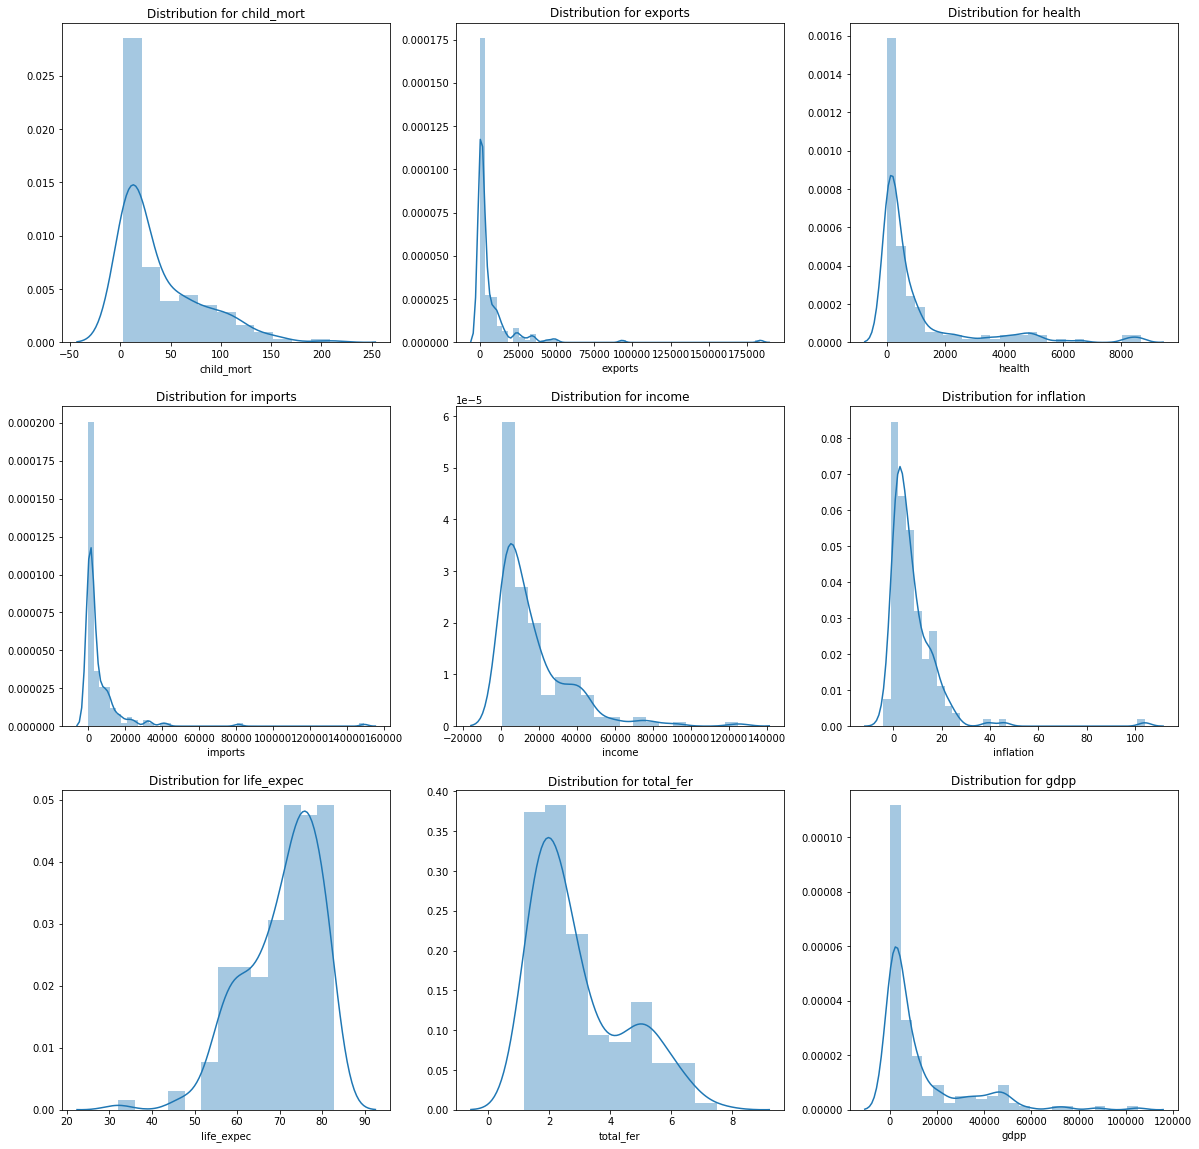

In [12]:
plt.figure(figsize=(20,20))
for i in range(1,len(num_cols)+1):
    plt.subplot(3,3,i)
    sns.distplot(countries[num_cols[i-1]])
    plt.title("Distribution for "+num_cols[i-1])
plt.show()

**The distribution is not normal for any of the variables.<br>
Presence of multiple modal data distribution can indicate that there are higher chances for internal grouping**

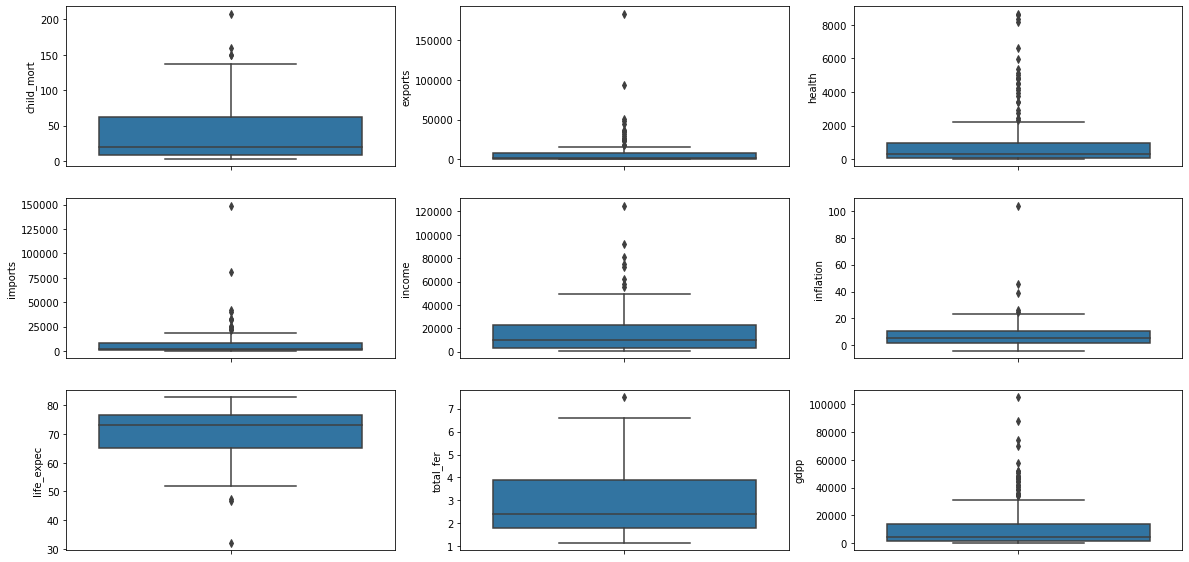

In [13]:
plt.figure(figsize=(20,10))
plt.tight_layout()
for i in range(1,len(num_cols)+1):
    plt.subplot(3,3,i)
    sns.boxplot(x=num_cols[i-1],data=countries,orient='v')
plt.show()

**As surmised before when trying to describe data, there are a lot of outliers in the data for most variables**

In [14]:
# plt.figure(figsize=(20,8))
# sns.boxplot(data=countries);

In [15]:
countries.describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


**We see a large number of outliers for most variables.**
- While outliers for child mortality, inflation, total_fer  is high on the upper side, these are actually matters of concern since they may be related to countries with poorer economies. Hence, not handling those.
- Similarly, high outliers on the lower end for life_expec may have similar reasons. Not handling those.
- exports, health, imports, income and gdpp have a large number of outliers even beyond 99%. Generally, healthier economies tend to have more likelihood of displaying higher values for these variables. Hence capping these to 99% data during outlier treatment.


**Finding countries with highest and least gdpp, income and child_mort**<br>
As suggested, these are the concern variables. Hence, plotting these in bar charts for comparison.

In [16]:
features = ['gdpp', 'income','child_mort']
def func_countryStats(field):
    sortedCountries = countries.sort_values([field],ascending=False)
    highest =sortedCountries.head()
    least = sortedCountries.tail()
    fieldNames = {'gdpp':'GDPP','income':'Income','child_mort':'Child Mortality'}
    fieldNames.setdefault(field,field.title())
    plt.tight_layout
    
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    high1 = sns.barplot(ax=ax[0],palette = 'cool',data=highest,y=field,x=highest.index)#,orient='v')
    high1.set_title('Countries with highest '+fieldNames[field])
    low1 = sns.barplot(ax=ax[1],palette = 'viridis',data=least,y=field,x=least.index)#,orient='v')
    low1.set_title('Countries with least '+fieldNames[field])
    plt.show()        

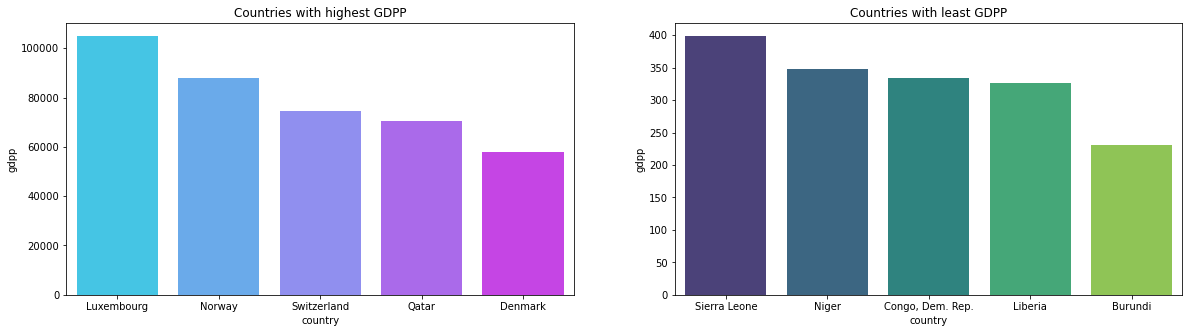

In [17]:
func_countryStats('gdpp')

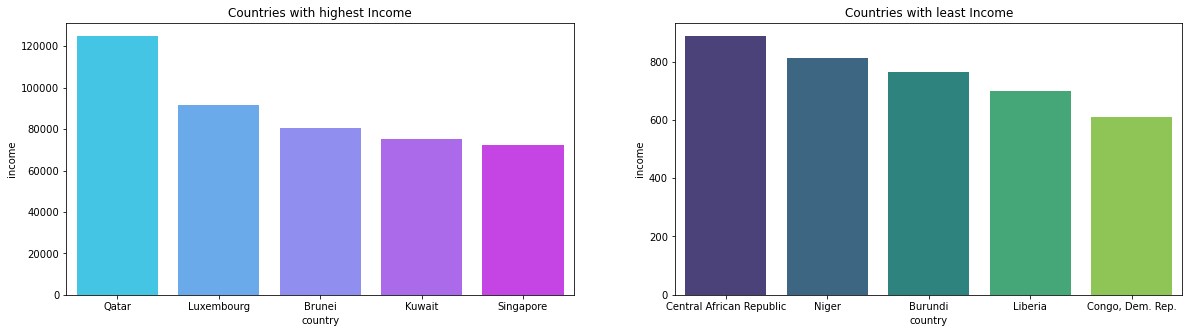

In [18]:
func_countryStats('income')

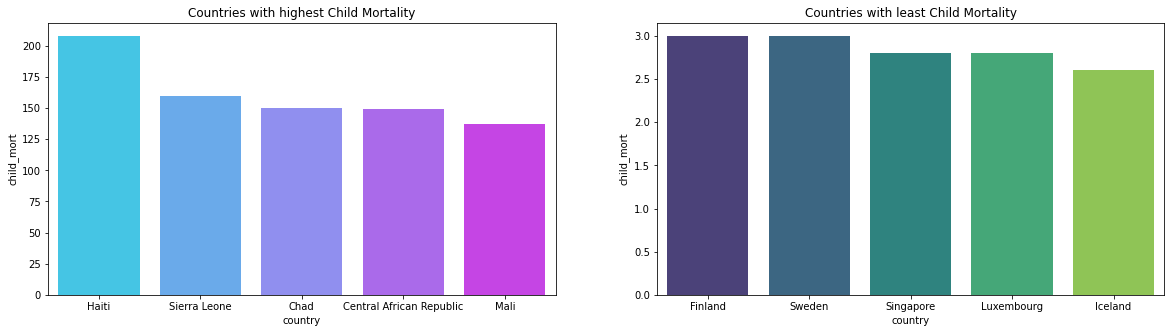

In [19]:
func_countryStats('child_mort')

**As can be seen, the countries with highest GDPP have some overlap with the countries with highest GDPP i.e. Luxembourg, Qatar. Similarly, both these have overlap with least child mortality coutries i.e. Luxembourg. <br>
It, therefore, appears possible that countries with higher incomes and GDPP have lower child mortalities.**

**Similarly, it can also be seen, the countries with least GDPP have some overlap with the countries with least GDPP e.g. Niger, Liberia. Similarly, both these have overlap with least child mortality coutries i.e. Central African Republic, Sierra Leone. <br>
It, therefore, appears possible that countries with lower incomes and GDPP have higher child mortalities.**

## 3. Prepare the data for modelling

### Step 1: Removing (statistical) outliers

In [20]:

cap =0.99
outVars = ['exports','health','imports','income','gdpp']
for Vars in outVars:
    upperLimit = countries[Vars].quantile(cap)
    countries[Vars] = countries[Vars].apply(lambda x: upperLimit if x>upperLimit else x)

countries.describe(percentiles=[.01, .05, .10, .25, .5, .75, .90, .95, .99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.947964,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.513848,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000


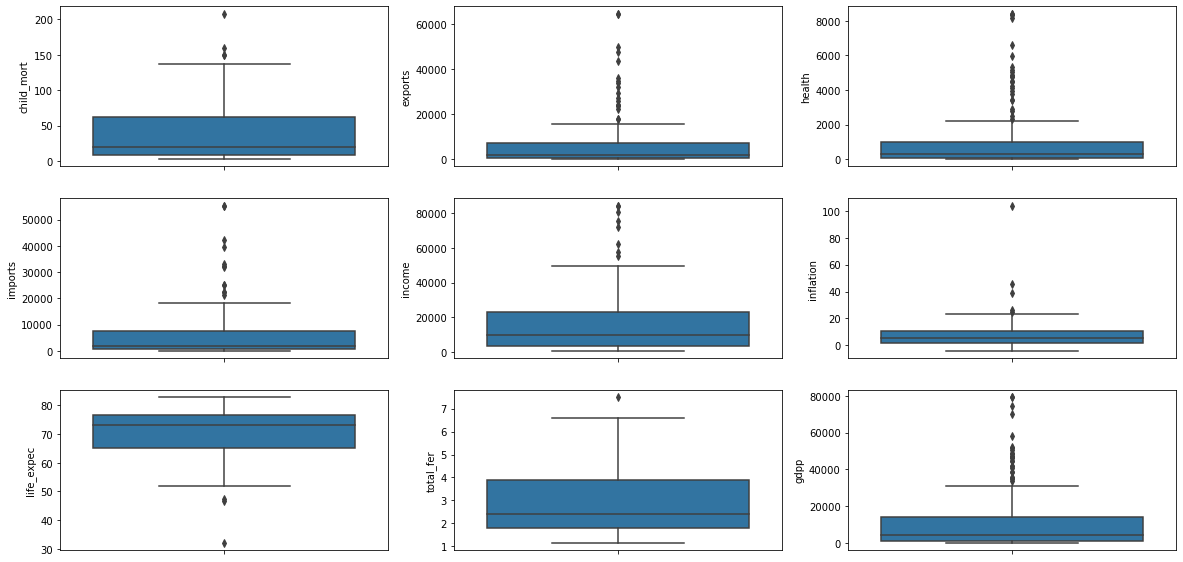

In [21]:
plt.figure(figsize=(20,10))
plt.tight_layout()
for i in range(1,len(num_cols)+1):
    plt.subplot(3,3,i)
    sns.boxplot(x=num_cols[i-1],data=countries,orient='v')
plt.show()

**Data is now capped to 99th quantile for exports, health, imports, income and GDPP.**

### Step 2: Rescaling

In [22]:
# import sklearn
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# fit_transform
countries_scaled = scaler.fit_transform(countries[num_cols])
countries_scaled.shape

(167, 9)

In [23]:
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = num_cols
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


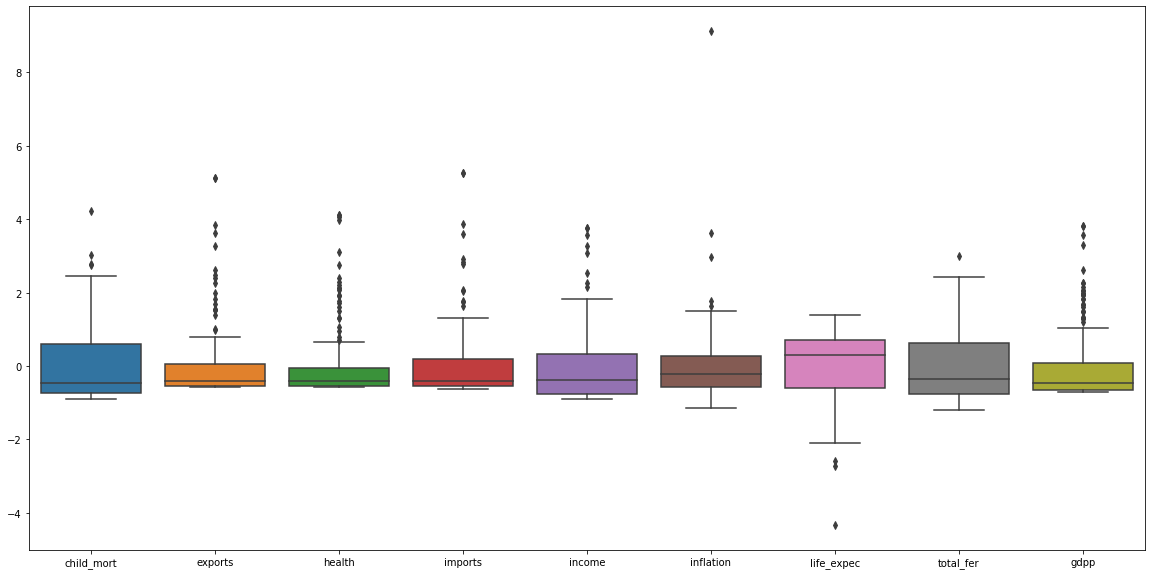

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=countries_scaled);

**Most data points appear to be more in same scale post standardization.**

### Hopkin's Statistic
Hopkins Statistic is used to check whether the data is indeed displays cluster tendency i.e. it can form distinct clusters.<br>
Hopkins statistic indicates how different given data is from randomly scattered data. The more the dataset is different from uniformly distributed data,the better the candidate to perform clustering. <br>
A score of 0 indicates a uniformly distributed data, 0.5 indicates random data distribution, 1 indicates cluster tendency. Hence, the closer the value to 1, higher the cluster tendency.

In [25]:
# Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np, pandas as pd
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(countries_scaled)

0.9227906526386493

**A score of 0.92 indicates a good cluster tendency. We can proceed with clustering**

## Step 4: Building a model

## K-Means Clustering

K-means clustering employs selecting K (user-defined) clusters as a starting point. After this the following steps are followed:
1. Choose k initial centroids 
2. Assignment: Find the euclidean distance of each point from the each of the centroids <br>Depending on which centroid is closer/least distance, assign each point to either of the centroids 
4. Optimization: Find the mean of all points assigned to each centroid and move centroid to that location 

Repeat steps 2,3 until the centroids no longer update I.e. points assigned remain same post iteration. 

In [27]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

## Finding the Optimal Number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

### Sum of Square Distance (SSD) or Elbow Curve

Elbow method is one of the most popular method used to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method requires drawing a line plot between SSE (Sum of Squared errors) vs number of clusters and finding the point representing the “elbow point” (the point after which the SSE or inertia starts decreasing in a linear fashion).

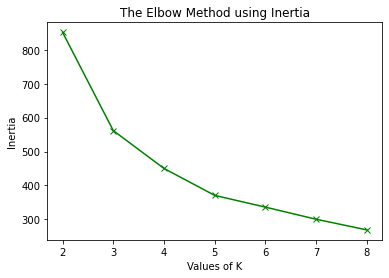

In [28]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
#     print("For n_clusters={0}, the inertia is {1}".format(num_clusters, kmeans.inertia_))
    ssd.append(kmeans.inertia_)    

plt.plot(range_n_clusters,ssd,'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

**As can be observed there is an elbow at 3. This indicates that k=3 is a good cluster number**

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.4785840154547688
For n_clusters=3, the silhouette score is 0.4225082959293209
For n_clusters=4, the silhouette score is 0.4083536290370275
For n_clusters=5, the silhouette score is 0.4146964405516596
For n_clusters=6, the silhouette score is 0.3158051449254877
For n_clusters=7, the silhouette score is 0.3017881216258413
For n_clusters=8, the silhouette score is 0.2807385643821612


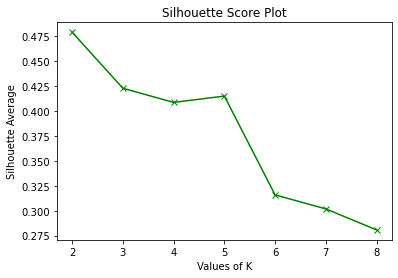

In [29]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
SilhouetteScore = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries_scaled, cluster_labels)
    SilhouetteScore.append((num_clusters,silhouette_avg))
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
# print(SilhouetteScore)
clusterDF = pd.DataFrame(SilhouetteScore)

plt.plot(clusterDF[0],clusterDF[1], 'gx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Average') 
plt.title('Silhouette Score Plot');

**As observed, the silhouette score is maximum at 5 though a peak is initially obersved at 3.**

**Since the observed k values show both 3 and 5 as ideal, will run K-Means algorithm with both these values**

In [30]:
# Model with k=3
kmeans3 = KMeans(n_clusters=3, random_state=0, max_iter=50)
kmeans3.fit(countries_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [31]:
kmeans3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [32]:
# assign the label
countries['cluster_id3'] = kmeans3.labels_
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id3
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


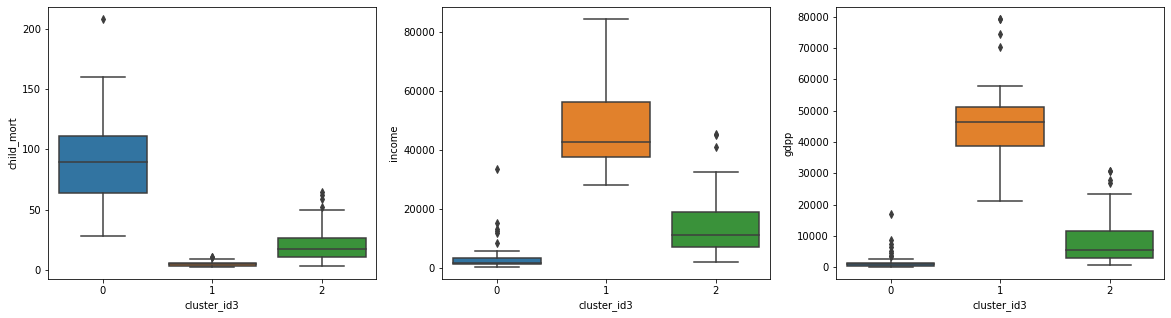

In [33]:
features = ['child_mort','income','gdpp']
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.boxplot(y='child_mort',x='cluster_id3',data=countries,orient='v')
plt.subplot(1,3,2)
sns.boxplot(y='income',x='cluster_id3',data=countries,orient='v')
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_id3',data=countries,orient='v')
plt.show()

**From the cluster_id graphs, it can be seen that while child mortality is highest in cluster 0, the income and GDPP of countries in cluster 0 are very low.<br>
On the other hand, cluster 2 indicates moderate values for all three features - child mortality, income and GDPP. <br>
Cluster 1 has least child mortality rates, but also very high income and GDPP in comparison.**

**It would be possible to surmise that there is a good distinction between the clusters.**

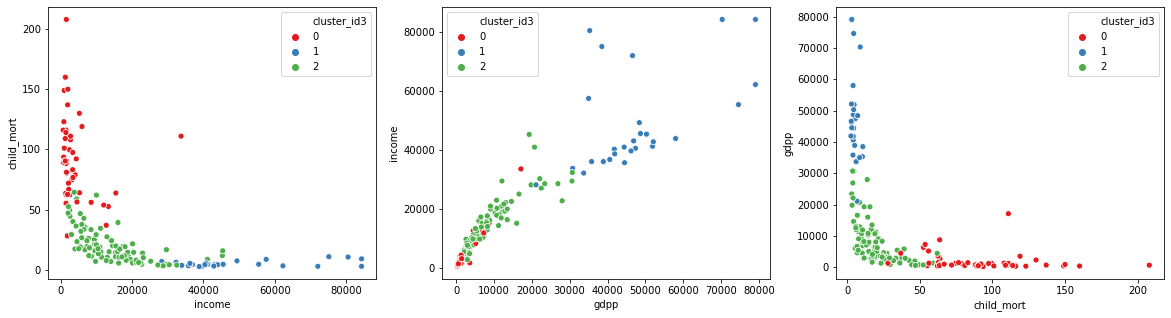

In [34]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.scatterplot(y='child_mort',x='income',hue='cluster_id3',data=countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(y='income',x='gdpp',hue='cluster_id3',data=countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(y='gdpp',x='child_mort',hue='cluster_id3',data=countries, palette='Set1')
plt.show()

**While there are three clusters displayed, there appears to be very little overlap of the cluster members indicating a good cluster separation.**

In [35]:
KclusterPerc3=countries.cluster_id3.value_counts(normalize=True)*100
KclusterPerc3

2    55.089820
0    28.742515
1    16.167665
Name: cluster_id3, dtype: float64

**There is good distribution balance of cluster members within the clusters as per K-Mean clustering algorithm**

In [36]:
#Model with k=5
kmeans5 = KMeans(n_clusters=5, random_state=0, max_iter=50)
kmeans5.fit(countries_scaled)

KMeans(max_iter=50, n_clusters=5, random_state=0)

In [37]:
kmeans5.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 4, 3, 1, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [38]:
# assign the label
countries['cluster_id5'] = kmeans5.labels_
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id3,cluster_id5
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,2
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,2
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,2


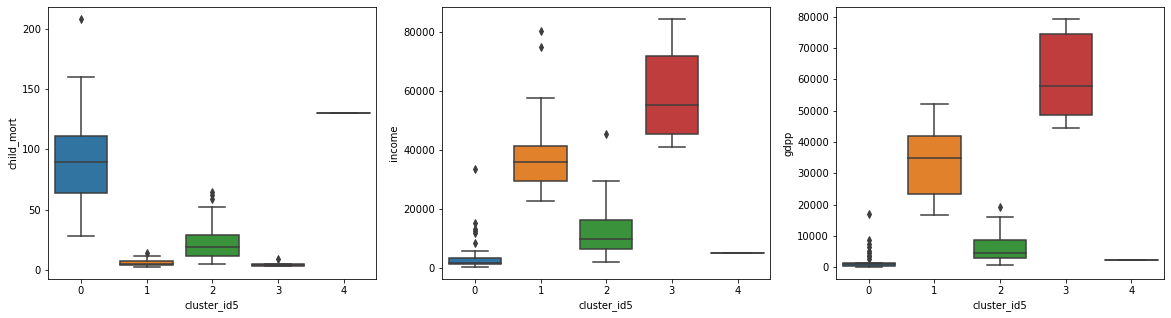

In [39]:
features = ['child_mort','income','gdpp']
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.boxplot(y='child_mort',x='cluster_id5',data=countries,orient='v')
plt.subplot(1,3,2)
sns.boxplot(y='income',x='cluster_id5',data=countries,orient='v')
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_id5',data=countries,orient='v')
plt.show()

**From the box plots, there appears to be a good distinction between the clusters, especially in the interquartile range of 25-75%. However, it appears that there are very few data points in cluster 4. This does not typically bode for a good cluster setting**

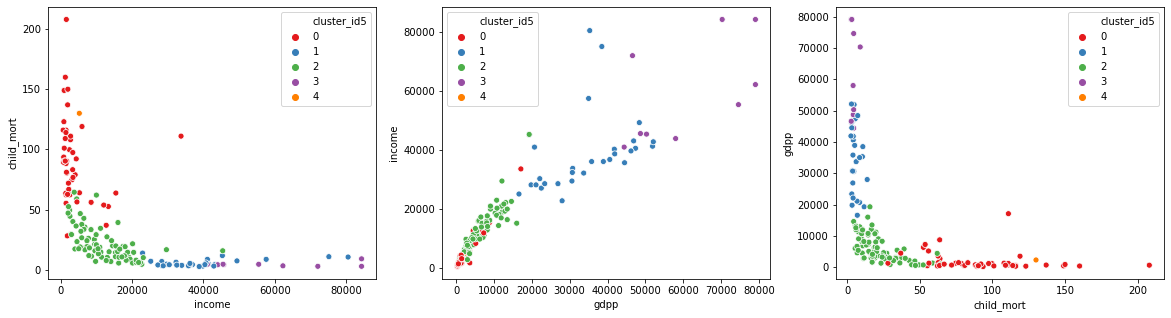

In [40]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.scatterplot(y='child_mort',x='income',hue='cluster_id5',data=countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(y='income',x='gdpp',hue='cluster_id5',data=countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(y='gdpp',x='child_mort',hue='cluster_id5',data=countries, palette='Set1')
plt.show()

**The 5 clusters seem to be getting cluster points overlap for each of the plots between 0 and 1 clusters and 2 and 3 clusters while there is very little representation of cluster 4.**

In [41]:
KclusterPerc5=countries.cluster_id5.value_counts(normalize=True)*100
KclusterPerc5

2    48.502994
0    28.143713
1    17.365269
3     5.389222
4     0.598802
Name: cluster_id5, dtype: float64

In [42]:
Kcluster5=countries.cluster_id5.value_counts()*100
Kcluster5

2    8100
0    4700
1    2900
3     900
4     100
Name: cluster_id5, dtype: int64

**It appears that the distribution is skewed with very few members in cluster 4**

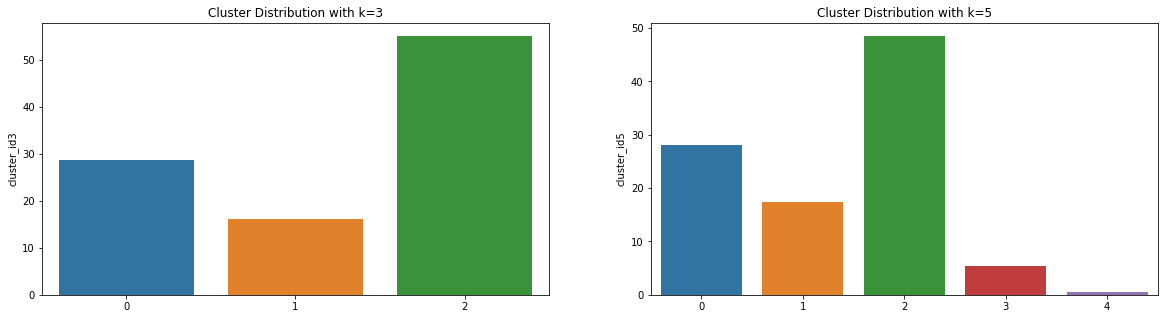

In [43]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,2,1)
a1 =sns.barplot(y=KclusterPerc3, x=KclusterPerc3.index)
a1.set_title('Cluster Distribution with k=3')
plt.subplot(1,2,2)
a2 = sns.barplot(y=KclusterPerc5, x=KclusterPerc5.index)
a2.set_title('Cluster Distribution with k=5')
plt.show()

**Cluster member distribution seems well distributed for k=3. However, for k=5, there are very few members for cluster 4.<br><br>
Hence proceeding with k=3 for K-Means algorithm**

In [44]:
countries.drop(['cluster_id5'],axis=1,inplace=True)

In [45]:
countries.rename(columns={'cluster_id3':'Kcluster_id'},inplace=True)

In [46]:
countries.groupby('Kcluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Kcluster_id,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.462963,1.775185,47476.888889
2,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565


## Hierarchical Clustering

**Instead of pre-defining the number of clusters, you first have to visually describe the similarity or dissimilarity between the different data points and then decide the appropriate number of clusters on the basis of these similarities or dissimilarities.**

**In hierarchical clustering, the data is not partitioned into a particular cluster in a single step. Instead, a series of partitions/merges take place, which may run from a single cluster containing all objects to n clusters that each contain a single object or vice-versa.**

**This is very helpful since you don’t have to specify the number of clusters beforehand.**

**Given a set of N items to be clustered, the steps in hierarchical clustering are:**
1. Calculate the NxN distance (similarity) matrix, which calculates the distance of each data point from the other 
2. Each item is first assigned to its own cluster, i.e. N clusters are formed 
3. The clusters which are closest to each other are merged to form a single cluster 
4. The same step of computing the distance and merging the closest clusters is repeated till all the points become part of a single cluster   

**Thus, what you have at the end is the dendrogram, which shows you which data points group together in which cluster at what distance.**

**This creates an inverted tree structure called Dendrogram.**


In [47]:
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kcluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [48]:
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In order to decide which clusters should be combined, a measure of dissimilarity between sets of observations is required. In most methods of hierarchical clustering, this is achieved by use of an appropriate metric (a measure of distance between pairs of observations), and a linkage criterion which specifies the dissimilarity of sets as a function of the pairwise distances of observations in the sets. 

Here, we look at linkage of two types: 
1. Single Linkage 
    - It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other.
    - A drawback of this method is that it tends to produce long thin clusters in which nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes that could usefully subdivide the data.
2. Complete Linkage
    - At the beginning of the process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters until all elements end up being in the same cluster. 
    - The method is also known as farthest neighbour clustering. The result of the clustering can be visualized as a dendrogram, which shows the sequence of cluster fusion and the distance at which each fusion took place.

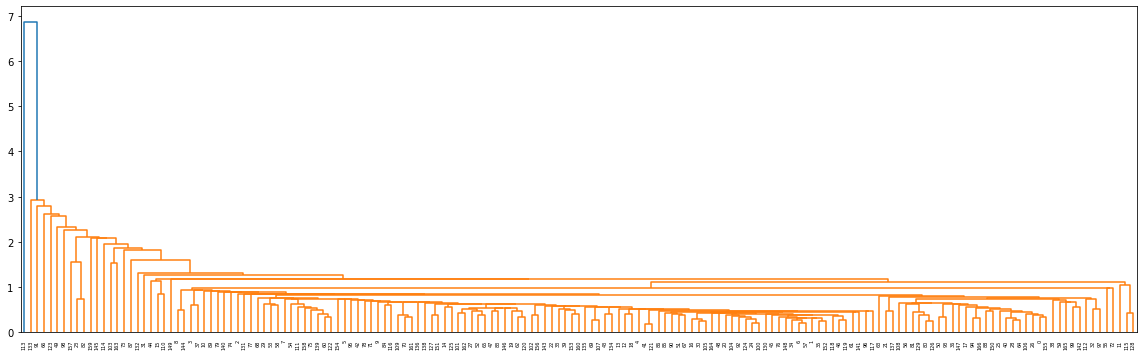

In [49]:
# single linkage
plt.figure(figsize = (20,6))
mergings = linkage(countries_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Single linkage clustering shows only 1 point in two of the clusters if we consider 3 clusters. Even increasing the cluster number displays the same kind of distribution. Hence, going for complete linkage method**

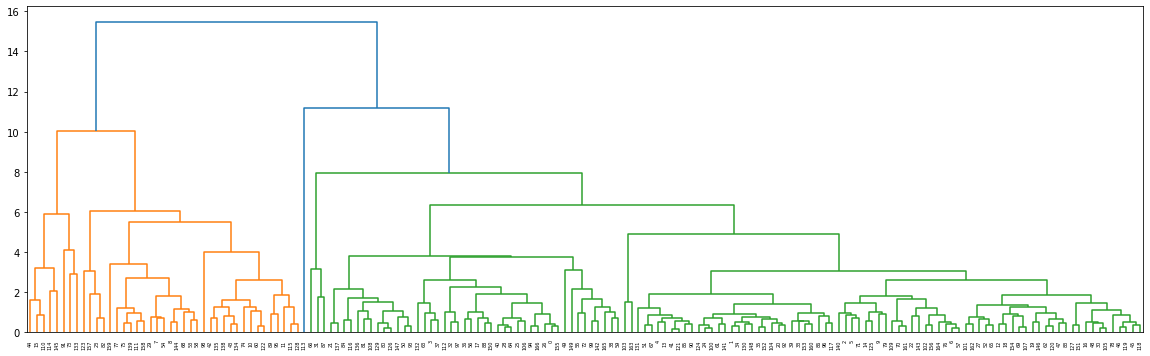

In [50]:
# complete linkage
plt.figure(figsize = (20,6))
mergings = linkage(countries_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

**Complete linkage method appears to display more distinct clusters. However, even here, one of the clusters appears to display on cluster member. We will check for different values of cluster numbers to look for distribution of cluster elements using complete linkage rather than single linkage**

In [51]:
#Starting with 3 clusters:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
# assign cluster labels
countries['cluster_id3'] = cluster_labels
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kcluster_id,cluster_id3
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


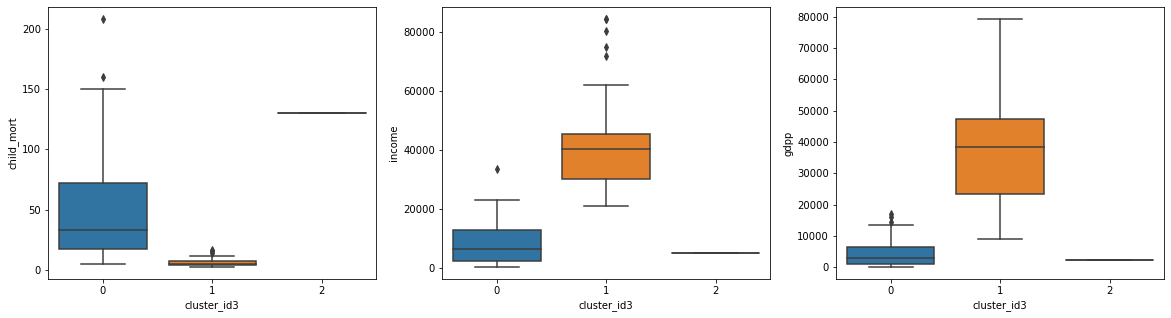

In [53]:
features = ['child_mort','income','gdpp']
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.boxplot(y='child_mort',x='cluster_id3',data=countries,orient='v')
plt.subplot(1,3,2)
sns.boxplot(y='income',x='cluster_id3',data=countries,orient='v')
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_id3',data=countries,orient='v')
plt.show()

**From the cluster_id plots, there doesn't appear to be much of an overlap between the clusters. However, there appear to be very few members in cluster 2.<br> This is not an ideal scenario for cluster development.**

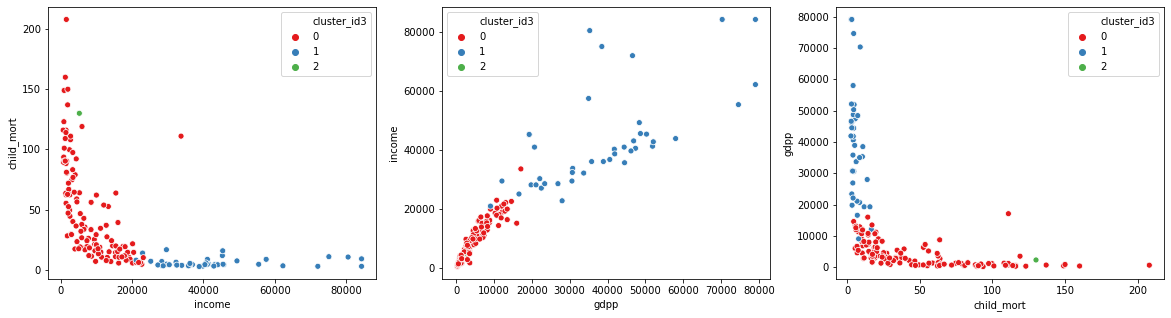

In [54]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.scatterplot(y='child_mort',x='income',hue='cluster_id3',data=countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(y='income',x='gdpp',hue='cluster_id3',data=countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(y='gdpp',x='child_mort',hue='cluster_id3',data=countries, palette='Set1')
plt.show()

**While clusters 0 and 1 appear to have very little overlap, it appears that there are very few members of cluster 2 as per the plot.**

In [55]:
HclusterPerc3=countries.cluster_id3.value_counts(normalize=True)*100
HclusterPerc3

0    74.850299
1    24.550898
2     0.598802
Name: cluster_id3, dtype: float64

In [56]:
Hcluster3=countries.cluster_id3.value_counts()*100
Hcluster3

0    12500
1     4100
2      100
Name: cluster_id3, dtype: int64

**The data appears highly skewed when looking at numbers/percentage of cluster members in each cluster**

In [57]:
#Starting with 5 clusters:
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# assign cluster labels
countries['cluster_id5'] = cluster_labels
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kcluster_id,cluster_id3,cluster_id5
country,,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0,0


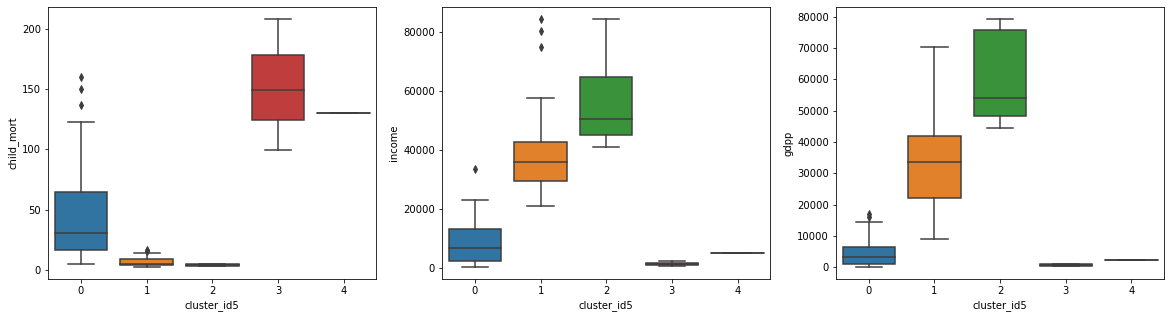

In [59]:
features = ['child_mort','income','gdpp']
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.boxplot(y='child_mort',x='cluster_id5',data=countries,orient='v')
plt.subplot(1,3,2)
sns.boxplot(y='income',x='cluster_id5',data=countries,orient='v')
plt.subplot(1,3,3)
sns.boxplot(y='gdpp',x='cluster_id5',data=countries,orient='v')
plt.show()

**From the boxplots, the clusters seem to be quite distinct.However, the plot for cluster 4 indicates very few members in the cluster.**

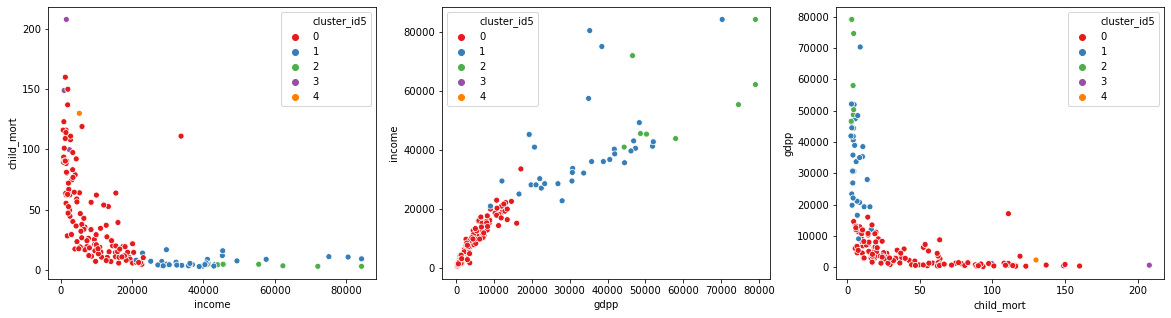

In [60]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,3,1)
sns.scatterplot(y='child_mort',x='income',hue='cluster_id5',data=countries, palette='Set1')
plt.subplot(1,3,2)
sns.scatterplot(y='income',x='gdpp',hue='cluster_id5',data=countries, palette='Set1')
plt.subplot(1,3,3)
sns.scatterplot(y='gdpp',x='child_mort',hue='cluster_id5',data=countries, palette='Set1')
plt.show()

**While there are three clusters displayed, there appears to be severe overlap amongst cluster members of different clusters. Additionally, there seem to very few cluster 3 and 4 members being displayed.**

In [61]:
HclusterPerc5=countries.cluster_id5.value_counts(normalize=True)*100
HclusterPerc5

0    73.053892
1    19.760479
2     4.790419
3     1.796407
4     0.598802
Name: cluster_id5, dtype: float64

In [62]:
Hcluster5=countries.cluster_id5.value_counts()*100
Hcluster5

0    12200
1     3300
2      800
3      300
4      100
Name: cluster_id5, dtype: int64

**The data appears highly skewed when looking at numbers/percentage of cluster members in each cluster**

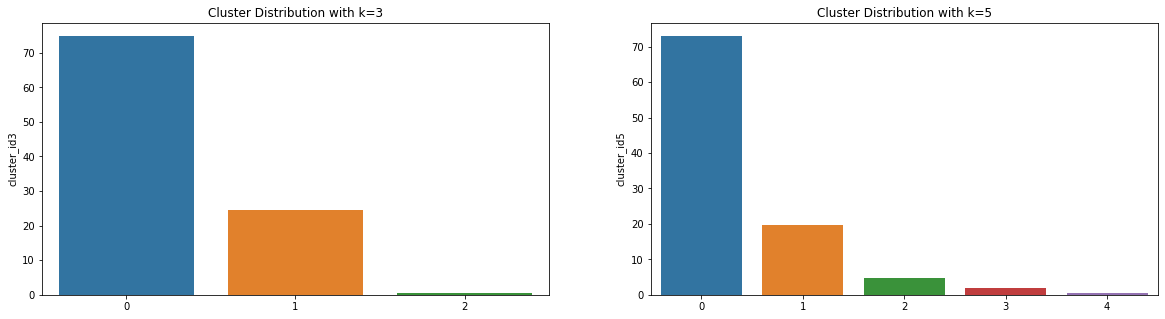

In [63]:
plt.figure(figsize=(20,5))
plt.tight_layout()
plt.subplot(1,2,1)
a1 = sns.barplot(y=HclusterPerc3, x=HclusterPerc3.index)
a1.set_title('Cluster Distribution with k=3')
plt.subplot(1,2,2)
a2 = sns.barplot(y=HclusterPerc5, x=HclusterPerc5.index)
a2.set_title('Cluster Distribution with k=5')
plt.show()

**The cluster distribution as indicated by hierarchical clustering looks highly skewed for both cluster values 3 and 5.
<br>This is not an indication of good cluster distribution.<br><br>Hence, proceeding with** *K-Means* **clustering with** *3 clusters* **for final analysis**. 

In [64]:
countries.drop(['cluster_id3','cluster_id5'],axis=1,inplace=True)

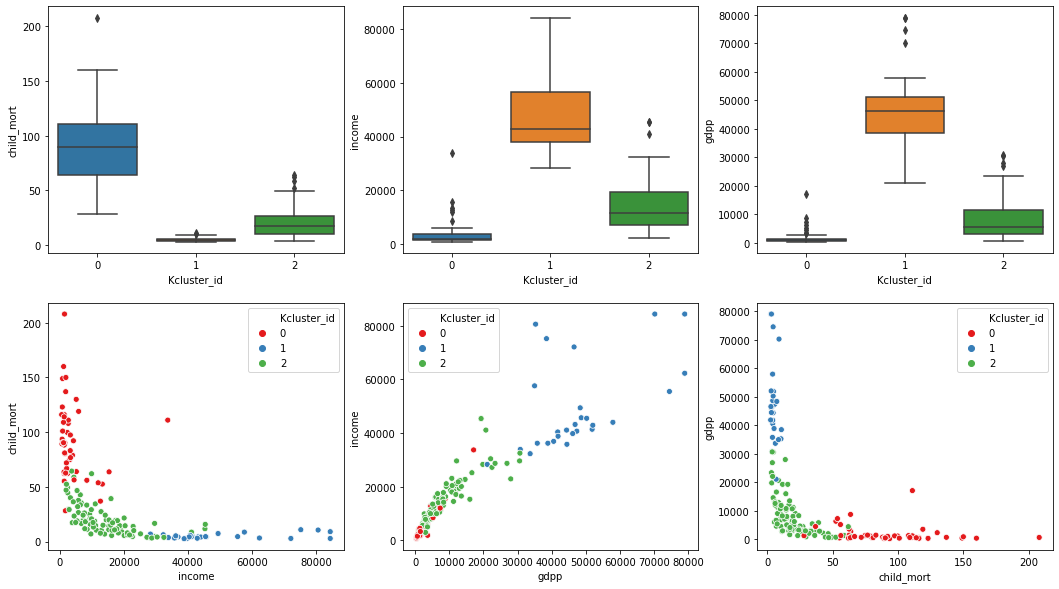

In [65]:
#Repeating box plots for K-Means clustering with k=3 for ease of distinction
features = ['child_mort','income','gdpp']
plt.figure(figsize=(18,10))
plt.tight_layout()
plt.subplot(2,3,1)
sns.boxplot(y='child_mort',x='Kcluster_id',data=countries,orient='v')
plt.subplot(2,3,2)
sns.boxplot(y='income',x='Kcluster_id',data=countries,orient='v')
plt.subplot(2,3,3)
sns.boxplot(y='gdpp',x='Kcluster_id',data=countries,orient='v')

plt.subplot(2,3,4)
sns.scatterplot(y='child_mort',x='income',hue='Kcluster_id',data=countries, palette='Set1')
plt.subplot(2,3,5)
sns.scatterplot(y='income',x='gdpp',hue='Kcluster_id',data=countries, palette='Set1')
plt.subplot(2,3,6)
sns.scatterplot(y='gdpp',x='child_mort',hue='Kcluster_id',data=countries, palette='Set1')

plt.show()


**From the box plots, it can be seen that while child mortality is highest in cluster 0, the income and GDPP of countries in cluster 0 are very low.<br>
On the other hand, cluster 2 indicates moderate values for all three features - child mortality, income and GDPP. <br>
Cluster 1 has least child mortality rates, but also very high income and GDPP in comparison.**

**It would be possible to surmise that there is a good distinction between the clusters. <br>
We could consider the clusters 0, 2 and 1 as underdeveloped, developing and developed countries respectively.**

**From the scatter plots, it can be surmised that child mortality is typically higher in countries with lower GDPP and income and vice versa. Income and GDPP display a positive linear correlation.**

In [66]:
Kcountries = countries[countries['Kcluster_id']==0]

In [67]:
Kcountries.sort_values(by=['income','gdpp','child_mort'],ascending=[True,True,False])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kcluster_id
country,,,,,,,,,,
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.470,60.8,5.02,327.0,0
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
Niger,123.0,77.2560,17.9568,170.868,814.0,2.550,58.8,7.49,348.0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.640,54.5,5.56,419.0,0
Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.100,53.1,5.31,459.0,0
Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,0
Togo,90.3,196.1760,37.3320,279.624,1210.0,1.180,58.7,4.87,488.0,0


In [68]:
top10 = Kcountries.sort_values(by=['income','gdpp','child_mort'],ascending=[True,True,False]).head(10)
print(pd.DataFrame(top10.index))

                    country
0          Congo, Dem. Rep.
1                   Liberia
2                   Burundi
3                     Niger
4  Central African Republic
5                Mozambique
6                    Malawi
7                    Guinea
8                      Togo
9              Sierra Leone


**As per K-Means clustering, the top 10 countries in need of aid are:**
1. Congo, Dem. Rep.
2. Liberia
3. Burundi
4. Niger
5. Central African Republic
6. Mozambique
7. Malawi
8. Guinea
9. Togo
10. Sierra Leone